# install


In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

/home/adham.ibrahim/.conda/envs/Ai/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


There are 1 GPU(s) available.
We will use the GPU: Quadro RTX 6000
Sat Dec  3 18:17:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 6000     On   | 00000000:73:00.0 Off |                  Off |
| 33%   31C    P8    16W / 260W |    191MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                     

In [2]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

fatal: destination path 'arabert' already exists and is not an empty directory.


In [39]:
pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [41]:
pip install xlrd==1.2.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


# dataset aug


In [7]:
ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)

ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [8]:
ailments_data['prompt'].value_counts()

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64

In [9]:
ailments_data['prompt'].value_counts()[0]

31

In [10]:
from statistics import mode
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

#print(mode(ailments_data['prompt']) ,' ',ailments_data['prompt'].value_counts()[0])
#symptoms=list(ailments_data['prompt'].unique())
max_count = ailments_data['prompt'].value_counts()[0]

aug_data = ailments_data
 
for ind in ailments_data.index:
  print(aug_data['prompt'].value_counts())
  label = aug_data['prompt'][ind]
  texts = aug_data['phrase'][ind]
  name_count = len(aug_data.loc[aug_data['prompt'] == label])
  #print(name_count,' ',max_count)
  if name_count < max_count:
    #print(label) 
    aug = naw.RandomWordAug(action="swap")

    if max_count - name_count > name_count:
       augmented_text = aug.augment(texts,n=1)
    else:
       augmented_text = aug.augment(texts,n=2)

    for string in augmented_text:
       aug_data = aug_data.append({'phrase' : string,
                      'prompt' : label} , 
                      ignore_index=True)



#manual oversample




Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Stress        23
Allergy       23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       25
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       27
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Allergy       29
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Allergy       31
Flu           31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Allergy       31
Flu           31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name:

In [11]:
print(aug_data['prompt'].value_counts())
aug_data

Anemia        32
Fatigue       32
Diarrhea      32
Bronchitis    32
Stress        31
Allergy       31
Flu           31
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
216,أشعر بسرعة بالغضب,Stress
217,لدي في القلب مشاكل حيث أن دقات القلب سريعة,Stress
218,مشاكل لدي في القلب حيث أن دقات سريعة القلب,Stress
219,لدي اضطرابات في النوم مختلفة لاسباب,Stress


In [12]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

def dataAugFun(ailments_data, N):


  aug_data = ailments_data.head(0)

  texts = ailments_data['phrase']
  for ind in ailments_data.index:
      texts = ailments_data['phrase'][ind]
      label = ailments_data['prompt'][ind]
      aug = naw.RandomWordAug(action="swap")
      augmented_text = aug.augment(texts,n=N)
      
      for string in augmented_text:
        aug_data = aug_data.append({'phrase' : string,
                        'prompt' : label} , 
                        ignore_index=True)

    
  return aug_data

In [13]:
aug_datax2 = dataAugFun(aug_data , 2)
aug_datax2 = aug_datax2.drop_duplicates(subset=['phrase'])
aug_datax2.index = range(0,len(aug_datax2))
aug_datax2['prompt'].value_counts()

Fatigue       55
Allergy       55
Anemia        54
Flu           53
Stress        50
Bronchitis    46
Diarrhea      29
Name: prompt, dtype: int64

In [14]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "text"
LABEL_COLUMN = "label"

In [15]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [16]:
#ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
aug_datax2.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)


aug_datax2.columns = [DATA_COLUMN, LABEL_COLUMN]
print(aug_datax2[LABEL_COLUMN].value_counts())

label_list = list(aug_datax2[LABEL_COLUMN].unique())

#ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].astype('category')

#ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].cat.codes
aug_datax2


train, test = train_test_split(aug_datax2, test_size=0.2, random_state=42)


data = CustomDataset("ailments_data", train, test, label_list)
# # all_datasets.append(data_Hard)

Fatigue       55
Allergy       55
Anemia        54
Flu           53
Stress        50
Bronchitis    46
Diarrhea      29
Name: label, dtype: int64


# train

In [17]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [18]:

# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = 'Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city' # we are going to use the twitter AraBERT since it has emojis and dialects

#model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects


In [19]:
arabic_prep = ArabertPreprocessor(model_name)

data.train[DATA_COLUMN] = data.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
data.test[DATA_COLUMN] = data.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [20]:
list(data.train[DATA_COLUMN][0:10])

['أنا أعاني الاسهال من',
 'أن أبدأ أعطس عندما بجوار أكون زهرة',
 'أريد أنام أن في أي وقت',
 'بالغضب بسرعة أشعر',
 'ل',
 'ن',
 'أشعر بالضعف جدا ، راسي يدور عندما استيقظ',
 'أشعر بضعف شديد',
 'لا أستطيع الضوء تحمل والضوضاء',
 'بالتعب أشعر ولكن الشديد أستطيع النوم لا']

In [21]:
tok = AutoTokenizer.from_pretrained(model_name)

Training Sentence Lengths: 


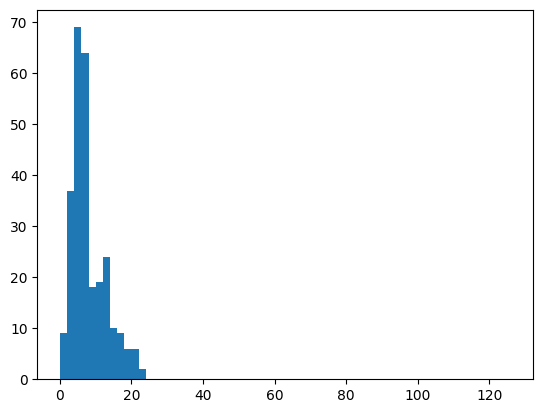

Testing Sentence Lengths: 


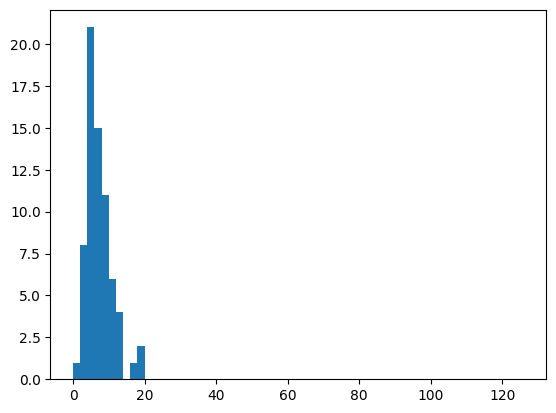

In [22]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

In [23]:
max([ len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()])
max([ len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()])

max_len=25

In [24]:
data_train_tok =   [tok.tokenize(sentence) for sentence in data.train[DATA_COLUMN].to_list()]

data_test_tok = [tok.tokenize(sentence) for sentence in data.test[DATA_COLUMN].to_list()]


In [25]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data.train[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  0
Truncated testing sequences:  0


In [63]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()
      """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map
      

    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())
        
      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True,
          return_tensors="pt"
      )      
      return inputs

In [64]:
data.train[LABEL_COLUMN].to_list()

['Diarrhea',
 'Allergy',
 'Fatigue',
 'Stress',
 'Diarrhea',
 'Diarrhea',
 'Anemia',
 'Fatigue',
 'Flu',
 'Fatigue',
 'Anemia',
 'Bronchitis',
 'Stress',
 'Bronchitis',
 'Bronchitis',
 'Fatigue',
 'Allergy',
 'Allergy',
 'Fatigue',
 'Fatigue',
 'Flu',
 'Stress',
 'Stress',
 'Stress',
 'Stress',
 'Fatigue',
 'Flu',
 'Allergy',
 'Flu',
 'Anemia',
 'Flu',
 'Allergy',
 'Fatigue',
 'Allergy',
 'Allergy',
 'Stress',
 'Stress',
 'Flu',
 'Stress',
 'Fatigue',
 'Fatigue',
 'Anemia',
 'Bronchitis',
 'Fatigue',
 'Allergy',
 'Allergy',
 'Fatigue',
 'Stress',
 'Bronchitis',
 'Allergy',
 'Allergy',
 'Bronchitis',
 'Diarrhea',
 'Anemia',
 'Stress',
 'Allergy',
 'Stress',
 'Diarrhea',
 'Anemia',
 'Fatigue',
 'Bronchitis',
 'Fatigue',
 'Flu',
 'Stress',
 'Flu',
 'Bronchitis',
 'Anemia',
 'Stress',
 'Bronchitis',
 'Allergy',
 'Bronchitis',
 'Flu',
 'Anemia',
 'Allergy',
 'Allergy',
 'Fatigue',
 'Diarrhea',
 'Anemia',
 'Diarrhea',
 'Stress',
 'Diarrhea',
 'Fatigue',
 'Flu',
 'Bronchitis',
 'Bronchitis',


In [65]:
label_map = { v:index for index, v in enumerate(data.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    data.train[DATA_COLUMN].to_list(),
    data.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    data.test[DATA_COLUMN].to_list(),
    data.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{'Allergy': 0, 'Anemia': 1, 'Bronchitis': 2, 'Diarrhea': 3, 'Fatigue': 4, 'Flu': 5, 'Stress': 6}


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

6

In [66]:
test_dataset[0]

{'input_ids': tensor([[    2,  5081,  1947,  9261, 26369,     3,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]])}

In [29]:
print(next(iter(train_dataset)))

InputFeatures(input_ids=[2, 2043, 21182, 2339, 44766, 1939, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=3)


In [30]:
len(label_map)

7

In [31]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map), ignore_mismatched_sizes=True)

In [32]:
def compute_metrics(p): #p should be of type EvalPrediction
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  #print(classification_report(p.label_ids,preds))
  #print(confusion_matrix(p.label_ids,preds))
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  #macro_precision = precision_score(p.label_ids,preds,average='macro')
  #macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  precision = 
  return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
  }

In [33]:
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False

In [34]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 1e-5,
    fp16 = False, # enable this when using V100 or T4 GPU
    per_device_train_batch_size = 16, # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 1, # use this to scale batch size without needing more memory
    num_train_epochs= 20,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    logging_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

set_seed(training_args.seed)

In [35]:
train_dataset[0]

InputFeatures(input_ids=[2, 2043, 21182, 2339, 44766, 1939, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=3)

In [36]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([26, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([26]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
#start the training
trainer.train()

***** Running training *****
  Num examples = 278
  Num Epochs = 20
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 360


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 23.63 GiB total capacity; 3.01 GiB already allocated; 53.44 MiB free; 3.13 GiB reserved in total by PyTorch)

In [50]:
inv_label_map = inv_label_map = { v:k for k, v in label_map.items()}
print(inv_label_map)
trainer.model.config.label2id = label_map
trainer.model.config.id2label = inv_label_map
trainer.save_model("output_dir")
train_dataset.tokenizer.save_pretrained("output_dir")

Saving model checkpoint to output_dir
Configuration saved in output_dir/config.json


{0: 'Allergy', 1: 'Anemia', 2: 'Bronchitis', 3: 'Diarrhea', 4: 'Fatigue', 5: 'Flu', 6: 'Stress'}


Model weights saved in output_dir/pytorch_model.bin
tokenizer config file saved in output_dir/tokenizer_config.json
Special tokens file saved in output_dir/special_tokens_map.json


('output_dir/tokenizer_config.json',
 'output_dir/special_tokens_map.json',
 'output_dir/vocab.txt',
 'output_dir/added_tokens.json',
 'output_dir/tokenizer.json')

In [51]:
#copy the model to drive
!cp output_dir /content/drive/MyDrive

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
cp: -r not specified; omitting directory 'output_dir'


In [37]:
model = AutoModelForSequenceClassification.from_pretrained("output_dir", return_dict=True, num_labels=len(label_map), ignore_mismatched_sizes=True)


loading configuration file output_dir/config.json
Model config BertConfig {
  "_name_or_path": "Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Allergy",
    "1": "Anemia",
    "2": "Bronchitis",
    "3": "Diarrhea",
    "4": "Fatigue",
    "5": "Flu",
    "6": "Stress"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Allergy": 0,
    "Anemia": 1,
    "Bronchitis": 2,
    "Diarrhea": 3,
    "Fatigue": 4,
    "Flu": 5,
    "Stress": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_he

In [91]:
batch = test_dataset[0]
import numpy as np
np.argmax(model(**test_dataset[2]).logits[0].tolist())

0

In [72]:
len(test_dataset)

69

In [126]:
import numpy as np
preds = []
true=[]
for i in range(len(test_dataset)):
    preds.append(np.argmax(model(**test_dataset[i]).logits[0].tolist()))
    true.append(label_map[test_dataset.target[i]])


In [130]:
from sklearn.metrics import classification_report
print(classification_report(true,preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.88      0.94        17
           2       1.00      0.75      0.86         8
           3       1.00      0.43      0.60         7
           4       0.89      1.00      0.94         8
           5       0.77      1.00      0.87        10
           6       0.82      1.00      0.90         9

    accuracy                           0.88        69
   macro avg       0.90      0.87      0.86        69
weighted avg       0.91      0.88      0.88        69

